In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
from cmcrameri import cm
%matplotlib inline

In [2]:
EXPERIMENT_NAME = 'P3856'
EXPERIMENT_DIR = '/data2/experiments/{}'.format(EXPERIMENT_NAME)

In [3]:
EXTRACTED_FEATURES_DB_NAME = '{}/extracted-features/extracted-features.sqlite'.format(EXPERIMENT_DIR)
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
extracted_features_df = pd.read_sql_query("select sequence,charge,run_name,target_coords,monoisotopic_mz_centroid,rt_apex,scan_apex from features where classed_as == \'target\'", db_conn)
db_conn.close()


In [4]:
extracted_features_df['target_coords_d'] = extracted_features_df.apply(lambda row: json.loads(row.target_coords), axis=1)
extracted_features_df['target_coords_mz'] = extracted_features_df.apply(lambda row: row.target_coords_d['mono_mz'], axis=1)
extracted_features_df['target_coords_rt'] = extracted_features_df.apply(lambda row: row.target_coords_d['rt_apex'], axis=1)
extracted_features_df['target_coords_scan'] = extracted_features_df.apply(lambda row: row.target_coords_d['scan_apex'], axis=1)


In [5]:
extracted_features_df['delta_mz_ppm'] = (extracted_features_df.monoisotopic_mz_centroid - extracted_features_df.target_coords_mz) / extracted_features_df.target_coords_mz * 1e6
extracted_features_df['delta_rt'] = extracted_features_df.target_coords_rt - extracted_features_df.rt_apex
extracted_features_df['delta_scan'] = extracted_features_df.target_coords_scan - extracted_features_df.scan_apex


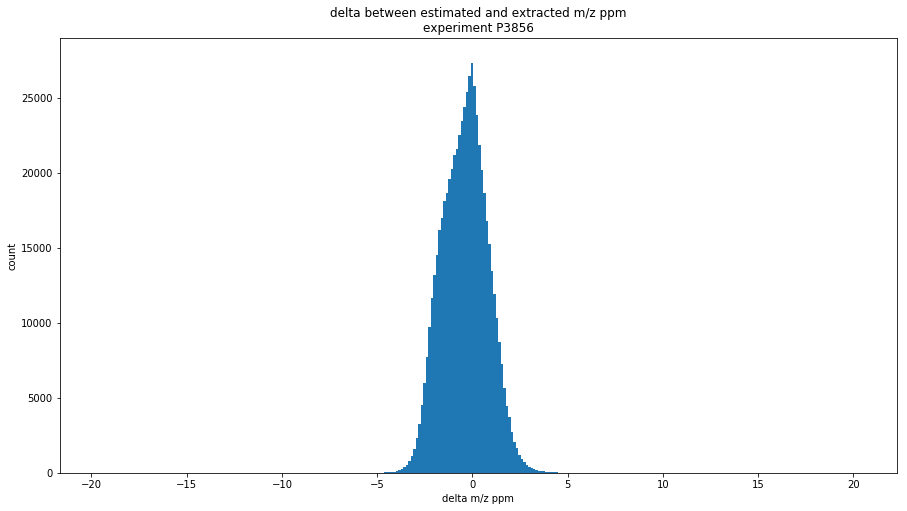

In [6]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_mz_ppm
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta m/z ppm')
plt.ylabel('count')
plt.title('delta between estimated and extracted m/z ppm\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()

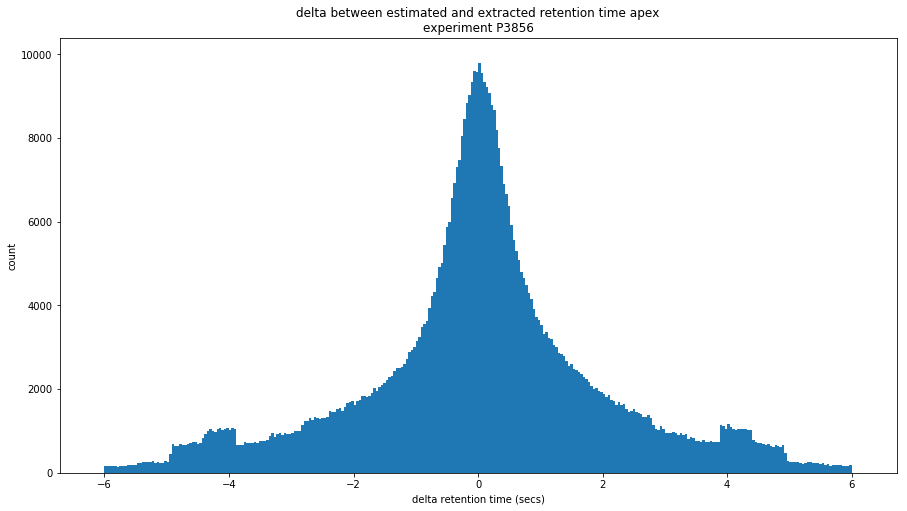

In [7]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_rt
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta retention time (secs)')
plt.ylabel('count')
plt.title('delta between estimated and extracted retention time apex\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()

In [8]:
extracted_features_df[(extracted_features_df.delta_rt<-4)][['sequence','charge','run_name','rt_apex','target_coords_rt','delta_rt']].sample(n=15)

,sequence,charge,run_name,rt_apex,target_coords_rt,delta_rt
48266,IGFAPAEILETFPER,2,P3856_YHE010_9_Slot1-1_1_5101,2206.550711,2202.022509,-4.528201
520294,ARPELEELLAK,2,P3856_YHE114_9_Slot1-1_1_5123,1822.162092,1817.726601,-4.435491
422287,FHEAQLSEK,2,P3856_YHE010_5_Slot1-1_1_5097,1011.410897,1006.846194,-4.564704
141890,DTSQSDKDLDDALDK,2,P3856_YHE114_6_Slot1-1_1_5120,1675.063219,1670.896323,-4.166896
260111,DSEEFGENEEENVHSK,2,P3856_YHE114_5_Slot1-1_1_5119,1647.960598,1643.060445,-4.900152
172787,QLQEQHYQQYMQQLYQVQLAQQQAALQK,3,P3856_YHE010_10_Slot1-1_1_5102,1969.745231,1964.122056,-5.623175
524796,FVLLSAQGSLMFHK,2,P3856_YHE114_9_Slot1-1_1_5123,1987.276909,1982.491496,-4.785413
131901,NGIPEVASRLLDVTPTSKFEDNLVGPDK,3,P3856_YHE010_1_Slot1-1_1_5093,2193.607693,2189.342943,-4.264749
342900,EGDTAILSLGHGAMVAVR,2,P3856_YHE211_9_Slot1-1_1_5112,1913.537040,1908.983278,-4.553762
412543,SFLLDLLNATGK,2,P3856_YHE211_3_Slot1-1_1_5106,2240.460316,2235.957105,-4.503211


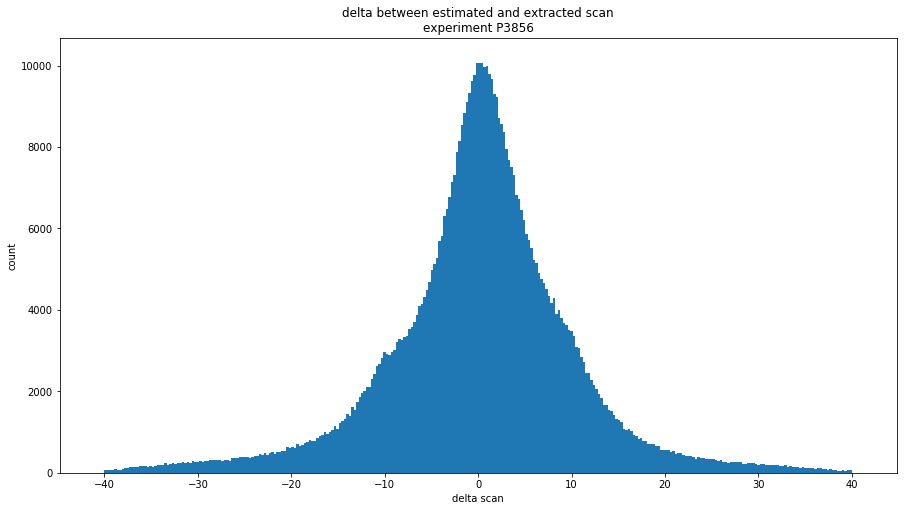

In [9]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_scan
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta scan')
plt.ylabel('count')
plt.title('delta between estimated and extracted scan\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()